# Homework 3

<span style="background-color: #FFFF00">I would like to apply 2 late days for this assignment. Thank you!</span>

### Question 1: Define/explain the following terms (10 points):
*(1) Curvature and solute effects for cloud droplet formation.*

The curvature effect describes how smaller droplets of water evaporate more easily. Curved surfaces have fewer molecules than flat surfaces, which means it is easier for these molecules to break aparts and cause their respective droplets to evaporate. As a result, these smaller droplets might evaporate before they can form clouds.

The solute effect describes how certain solutes bind with water ions, and these stronger bonds cause the water molecules to stick together more. As such, it is easier for large droplets to form, which in turn makes cloud droplet formation more common. In this sense, solutes "seed" the atmosphere by allowing water drop nuclei founndations to form around. 

*(2) Growth of raindrops by coalescence*

Droplets get most of their growth through coalescence, as condensation has considerably less impact on droplet size. Coalescence is when two smaller droplets collide - i.e. when the distance between their drop centers is less than or equal to the sum of their radii. Surface tension then causes them to merge and form a bigger droplet.


### Question 2: Marshall-Palmer distribution (20 points):


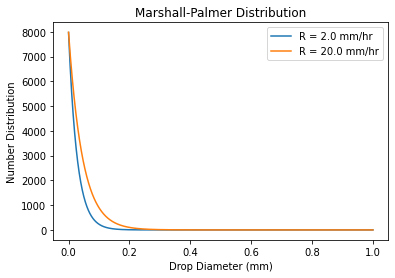

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range of rainfall rates (mm per hour, mmhr^-1) and drop diameters (mm)
R = [2.0, 20.0]
D = np.linspace(0.0001, 1, 1000)

def lambda_value(R):
    return 41 * R ** (-0.21)

# Calculate the number density ND for each rainfall rate
ND = {}
for r in R:
    ND[r] = 8000 * np.exp(-lambda_value(r) * D)

# Plot everything
fig, ax = plt.subplots()
for r in R:
    ax.plot(D, ND[r], label=f'R = {r} mm/hr')
plt.xlabel('Drop Diameter (mm)')
plt.ylabel('Number Distribution') # should this be density or distribution?
plt.title('Marshall-Palmer Distribution')
plt.legend()
plt.show()

In [36]:
# Calculate the mass per unit volume for each rainfall rate
density_water = 1000  # kg*m^-3
mass_per_vol = {}

# get the mass of a rain drop given a diamter
def mass_drop(diameter):
    return (4/3) * (diameter / 2)**3 * np.pi * density_water

for r in R:
    mass_per_vol[r] = ND[r] * mass_drop(D)

# Find the approximate diameter that contributes most to total mass for each rainfall rate
max_d = {}
for r in R:
    max_d[r] = D[np.argmax(mass_per_vol[r])]


print('Approximate diameter that contributes most to total mass:')
for r in R:
    print(f'At precipitation rate of {r} mm/hr: {round(max_d[r], 2)} mm')

Approximate diameter that contributes most to total mass:
At precipitation rate of 2.0 mm/hr: 0.08 mm
At precipitation rate of 20.0 mm/hr: 0.14 mm


### Question 3: Distribution of low, middle, and high level clouds (20 points):
*Using the International Satellite Cloud Climatology Project (ISCCP) cloud distribution
data (ISCCP.cloud.clim.nc), explain the distribution of low, middle, and high level clouds
in relation to the large-scale atmospheric circulation or climate regimes. For example,
certain types of clouds are dominant over the upper branch of the Hadley Cell or where
ocean temperature is cold.*

Using matplotlib, I was able to generate the following plots which show cloud distribution for low, middle, and high level clouds. These plots can help demonstrate certain principles of large-scale atmospheric circulation and climate regimes.

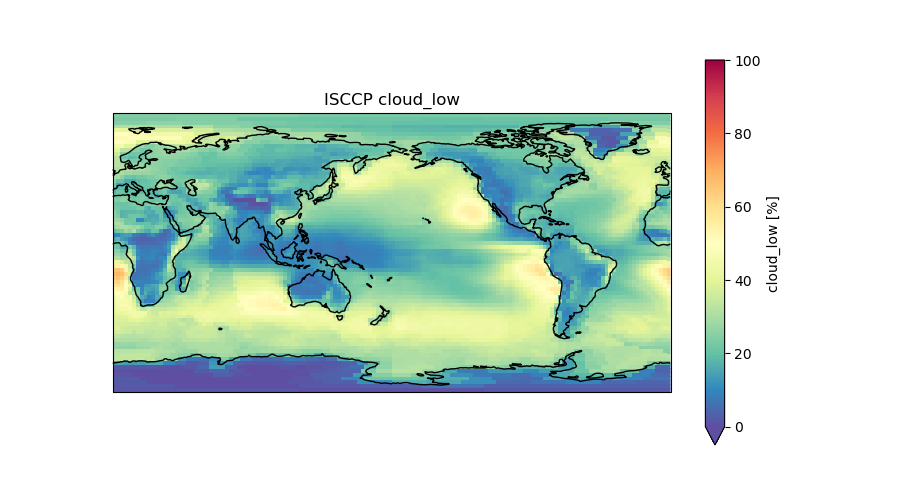
Low clouds seem to have a tendency to form more often on the west side of continents. This could be explained by the direction of surface water, since the earth's rotation means surface water flows East to West [citation](https://earthobservatory.nasa.gov/images/85843/cloudy-earth). There are also more low clouds where SST is lower, which makes sense since low SST means less water would evaporate.

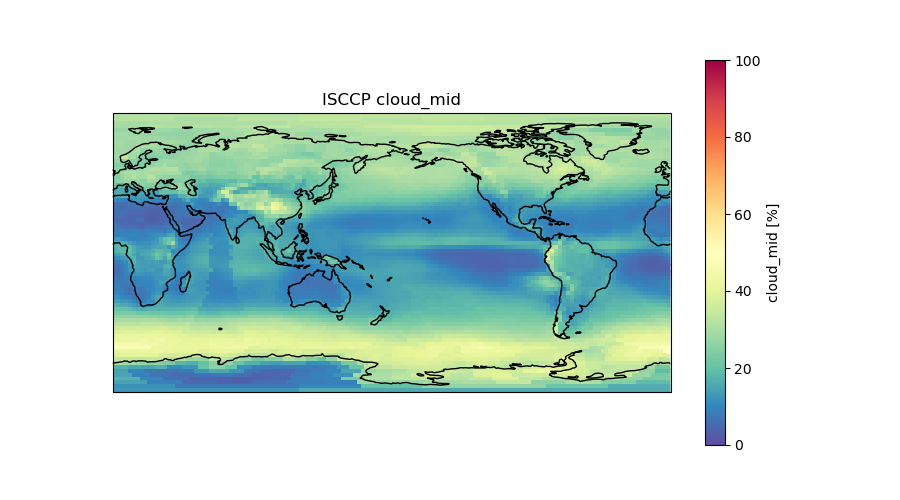
Middle cloud coverage appears most often around the middle latitudes. Perhaps this is due to a convergence of Hadley cells descending and Ferrel cells ascending, which forces counteract each other to put the clouds in the middle.

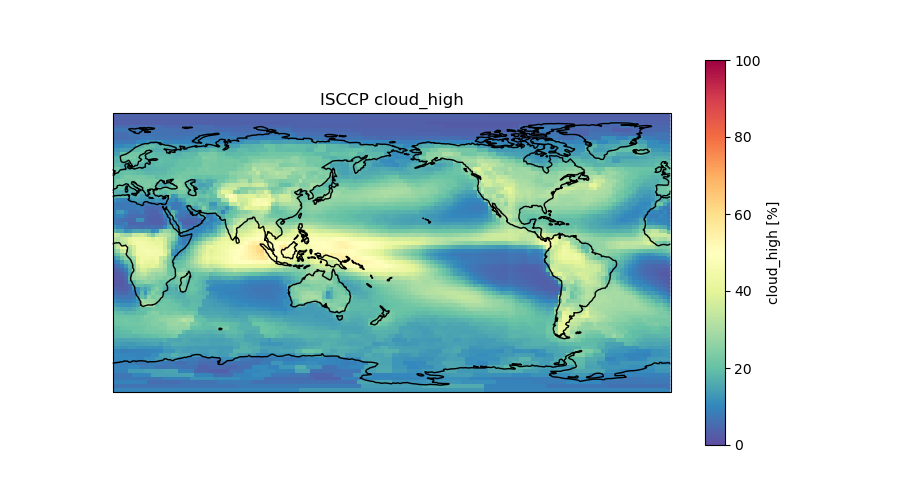
In general, the most high cloud coverage occured along the equator. One explanation for this is the affects of the ascending columns of Hadley cells - since Hadley cells cause air to rise along the equator, water droplets would be lifted high into the atmosphere to form high clouds.

### Question 4: Derive the dry adiabatic lapse rate starting from the 1st law of thermodynamics (10 points):
- Start with formula $dq=C_vdT+pd\alpha$
- dq is the energy added to or lost from a parcel of air. Since no heat is gained or lost in dry adiabatic process, dq = 0. Therefore, $0=C_vdT+pd\alpha$
- Rearrange this as $C_vdT=-pd\alpha$
- Divide both sides by $C_v$ to yield $dT=\frac{-p}{C_v}(d\alpha)$
- Divide both sides by dZ, the change in altitude, to get $\frac{dT}{dZ}=\frac{-p}{C_v}\frac{d\alpha}{dZ}$
- Not sure how to go from here, but I'm trying to use the hydrostatic equation